In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [22]:
df = pd.read_csv('heart.csv')
print(df.head())
print(df.info())
print(df.describe())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

In [23]:
#checking for missing values
print(df.isnull().sum())

#standardizing the data
from sklearn.preprocessing import StandardScaler

features = df.drop('target',axis = 1)
target = df['target']


scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)



age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [24]:
x_train,x_test,y_train,y_test = train_test_split(features_scaled,target,test_size = 0.2,random_state = 42)


In [25]:
#trainning the model
model = LogisticRegression(max_iter = 1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

Accuracy: 0.7951219512195122
Confusion Matrix: [[73 29]
 [13 90]]
Classification Report:               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



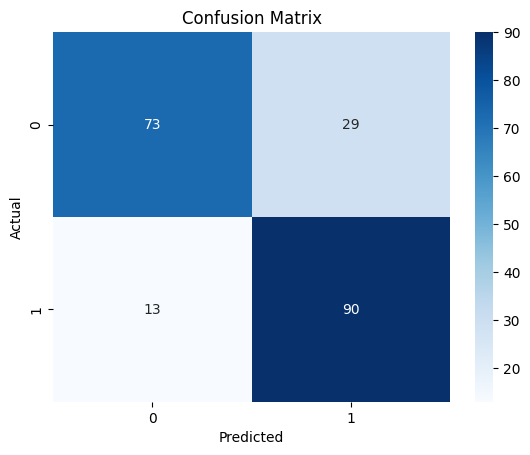

In [26]:
#evaluating the model
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)
c_matrix  = confusion_matrix(y_test,y_pred)
print('Confusion Matrix:',c_matrix)
class_report = classification_report(y_test,y_pred)
print('Classification Report:',class_report)

import seaborn as sns
sns.heatmap(c_matrix,annot = True,fmt = 'd',cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [27]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
p_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Perform grid search
g_srch = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
g_srch.fit(x_train, y_train)

# Best parameters
print('Best parameters found:', g_srch.best_params_)

# Evaluate the best model
best_model = g_srch.best_estimator_
y_pred_best = best_model.predict(x_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Optimized Accuracy: {accuracy_best}')


Best parameters found: {'C': 1, 'solver': 'liblinear'}
Optimized Accuracy: 0.7951219512195122
